<a href="https://colab.research.google.com/github/saneeinia/deep-codes/blob/master/met_per3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# region library

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn
from google.colab import files

#end region


In [ ]:

#region functions

def myDiag(x):
    s = x.shape
    out = np.zeros((s[1], s[1]))
    for i in range(s[1]):
        out[i, i] = x[0, i]
    return out

def myMSE(x):
    s = x.shape
    x = x*x
    summ = 0

    for i in range(s[0]):
        summ = summ + x[i, 0]
    return summ/s[0]

def normaliazation():
    global data
    mini = 0
    maxi = 0
    s = data.shape
    for i in range(s[0]):
        if maxi < data[i, 0]:
            maxi = data[i, 0]

        elif mini > data[i, 0]:
            mini = data[i, 0]
    for i in range(s[0]):
        data[i, 0] = ((data[i, 0] - mini) / (maxi - mini))

    return 0


def initializeData():
    global m
    global data
    global input_data

    normaliazation()

    for j in range(m-1):
        for i in range(data.size - mm):
            input_data[i, j] = data[i + j, 0]
    for i in range(data.size - mm):
        input_data[i, m-1] = data[i+mm-1, 0]
    # print(input_data)
    # print(input_data.shape)
    return 0




#endregion


In [ ]:

# region activation functions


def tanh(x):
    return ((math.e**(x)) - (math.e**(-x)))/((math.e**(x)) + (math.e**(-x)))


def tanhPrime(x):
    return 1-(tanh(x)**2)


def sig(x):
    return 1 / (1 + (math.e**(-x)))

def fsig(x,g):
    return abs(g) / (1 + (math.e**(-x*g)))

def sigg(x,g):
    return 1 / (1 + (math.e**(-x*g)))


def sigPrime(x):
    return sig(x)*(1-sig(x))

def fsigPrime(x,g):
    return abs(g)*(g * sigg(x,g) * (1-sigg(x,g)))

def fsigPrimeg(x,g):
    return (np.sign(g)*sigg(x,g))+ abs(g)*sigg(x,g)*(1-sigg(x,g))

def actFun(x):
   return sig(x)


def actFunPrime(x):
    return sigPrime(x)


def myF(x):
    return sig(x)


def myFPrime(x):
    return sigPrime(x)



# endregion


In [ ]:

# region class AutoEncoder

class autoEncoder:
    loww = 1
    highh = -1
    eta = 0.01
    trainNum = 200

    def __init__(self,inp,hiddenNum):


        

        self.inp =inp
        self.hiddenNum =hiddenNum
        self.w1 = np.random.uniform(self.loww, self.highh, (self.hiddenNum, self.inp))

        self.wz_1 = np.random.uniform(self.loww, self.highh, (self.hiddenNum, self.hiddenNum))
        self.z_1 =  np.zeros((self.hiddenNum, 1))


        self.w2 = np.random.uniform(self.loww, self.highh, (self.inp,self.hiddenNum))
        self.outp = np.zeros((inp,1))
        self.b2 = np.random.uniform(self.loww, self.highh, (self.inp,1))
       

        self.hiddenLay = np.zeros((self.hiddenNum, 1))
        self.b1 = np.random.uniform(self.loww, self.highh, (self.hiddenNum, 1))
       

        self.error = np.zeros((inp,1))
        self.prime = np.zeros(self.outp.shape)
    def AF1(self, x):
        return sig(x)


    def AFP1(self, x):
        return sigPrime(x)
    
    def AFG1(self,x):
        return sigPrimeg(x)

    def AF2(self, x):
       # return x
        return sig(x)

    def AFP2(self, x):
        #return np.ones(x.shape)
        return sigPrime(x)
    
  

    def train(self, x):

        net1 = self.w1 @ x + self.b1 + self.wz_1 @ self.z_1 
        self.hiddenLay = self.AF1(net1)
 
 
        net2 = self.w2 @ self.hiddenLay + self.b2
        self.outp = self.AF2(net2)

        self.error = x-self.outp
        self.prime = self.AFP2(net2)

        
        self.w1 = self.w1 - self.eta * -1 * np.transpose (np.transpose (self.error * self.prime) @ self.w2  * np.transpose (self.AFP1(net1))) @ np.transpose (x)
        self.b1 = self.b1 - self.eta * -1 * np.transpose (np.transpose (self.error * self.prime) @ self.w2  * np.transpose (self.AFP1(net1))) 
        self.wz_1 = self.wz_1 - self.eta * -1 * np.transpose (np.transpose (self.error * self.prime) @ self.w2  * np.transpose (self.AFP1(net1))) @ np.transpose (self.z_1)

        self.w2 = self.w2 - self.eta * -1 * (self.error * self.prime) @ np.transpose(self.hiddenLay)
        self.b2 = self.b2 - self.eta * -1 * (self.error * self.prime) 
        self.z_1 = self.hiddenLay



        #self.w1 = np.transpose(self.w2)
        
  
    def trainLoop(self,x):
        for i in range(self.trainNum):
            self.train(x)
    def cal(self,x):
        net1 = self.w1 @ x
        return (self.AF1(net1))



# endregion


In [ ]:
# region import data

uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#endregion

Saving DLdata1.xlsx to DLdata1.xlsx
User uploaded file "DLdata1.xlsx" with length 108745 bytes


In [ ]:

# region prepare data
data = pd.read_excel('DLdata1.xlsx', header=None)
data = data.to_numpy()
m = 4
mm =5
train_rate = 0.75
input_data = np.zeros((data.size - mm, m))
initializeData()
rawdata = input_data

# endregion


In [ ]:

# region initialize  number of neurons in each layer
numberOfNeuronsInAE1 = 6
numberOfNeuronsInAE2 = 8
numberOfNeuronsInAE3 = 10


numberOfData = input_data.shape[0]
numberOfInput = numberOfNeuronsInAE3
numberOfNeuronsInSecondLayer = 8
numberOfNeuronsInThirdLayer = 6
numberOfNeuronsInForthLayer = 4
#numberOfNeuronsInFifthLayer = 0
#numberOfNeuronsInSixthLayer = 1
numberOfOutput = 1
numOfTrain = round(numberOfData*train_rate)
numOfTest = numberOfData-numOfTrain
# endregion

In [ ]:
# region test
#nn1 = 10
#nn2 = 20
#ae1 = autoEncoder(10,6)
#myInput = np.random.uniform(0 ,1,(10, 1))
#print (myInput)
#result = np.zeros((10,1))
#mse = np.zeros ((20,1))
#print (result)
#print (ae1.inp)
#print ((ae1.outp).shape)
#for i in range(20):


 #   for j in range(10):
       
  #      ae1.train((myInput))
   # result = myInput - ae1.outp
   # mse[i,0] = myMSE((result))
#print (mse)
# endregion

In [ ]:

# region initialize weights

loww = -1
highh = 1
ae1 = autoEncoder(m-1,numberOfNeuronsInAE1)
ae2 = autoEncoder(numberOfNeuronsInAE1,numberOfNeuronsInAE2)
ae3 = autoEncoder(numberOfNeuronsInAE2, numberOfNeuronsInAE3)

# endregion

In [ ]:

maxOfEpoch = 200
myInput = np.zeros((1, m-1))
myInput2 = np.zeros((1,numberOfNeuronsInAE3))


In [ ]:

# region train stackAutoEncoder
for i in range(maxOfEpoch):


    for j in range(numOfTrain):
        for k in range(m - 1):
            myInput[0, k] = input_data[j, k]
        ae1.train(np.transpose(myInput))
    for j in range(numOfTrain):
        for k in range(m - 1):
            myInput[0, k] = input_data[j, k]
        ae2.train(ae1.cal(np.transpose(myInput)))
    for j in range(numOfTrain):
        for k in range(m - 1):
            myInput[0, k] = input_data[j, k]
        ae3.train(ae2.cal(ae1.cal(np.transpose(myInput))))

# endregion

In [ ]:

# region variables

eta = 0.01
train_error = np.zeros((numOfTrain, 1))
test_error = np.zeros((numOfTest, 1))
output_train = np.zeros((numOfTrain, 1))
output_test = np.zeros((numOfTest, 1))

mse_train = np.zeros((maxOfEpoch, 1))
mse_test = np.zeros((maxOfEpoch, 1))

myTarget = 0
error = 0
c = 0
# endregion


In [ ]:
# region initial parameters for NN
w1 = np.random.uniform(loww, highh, (numberOfNeuronsInSecondLayer, numberOfInput))
net1 = np.zeros((1, numberOfNeuronsInSecondLayer))
b1 = np.random.uniform(loww, highh, (1, numberOfNeuronsInSecondLayer))
o1 = np.zeros((1, numberOfNeuronsInSecondLayer))
zo1_1 = np.zeros((1, numberOfNeuronsInSecondLayer))
zw1_1 = np.random.uniform(loww, highh, (numberOfNeuronsInSecondLayer, numberOfNeuronsInSecondLayer))


w2 = np.random.uniform(loww, highh, (numberOfNeuronsInThirdLayer, numberOfNeuronsInSecondLayer))
net2 = np.zeros((1, numberOfNeuronsInThirdLayer))
b2 = np.random.uniform(loww, highh, (1, numberOfNeuronsInThirdLayer))
o2 = np.zeros((1, numberOfNeuronsInThirdLayer))
zo2_1 = np.zeros((1, numberOfNeuronsInThirdLayer))
zw2_1 = np.random.uniform(loww, highh, (numberOfNeuronsInThirdLayer, numberOfNeuronsInThirdLayer))


w3 = np.random.uniform(loww, highh, (numberOfNeuronsInForthLayer, numberOfNeuronsInThirdLayer))
net3 = np.zeros((1, numberOfNeuronsInForthLayer))
b3 =  np.random.uniform(loww, highh, (1, numberOfNeuronsInForthLayer))
o3 = np.zeros((1, numberOfNeuronsInForthLayer))
zo3_1 = np.zeros((1, numberOfNeuronsInForthLayer))
zw3_1 = np.random.uniform(loww, highh, (numberOfNeuronsInForthLayer, numberOfNeuronsInForthLayer))

#w4 = np.random.uniform(loww, highh, (numberOfNeuronsInFifthLayer, numberOfNeuronsInForthLayer))
#net4 = np.zeros((1, numberOfNeuronsInFifthLayer))
#b4 = np.random.uniform(loww, highh, (1, numberOfNeuronsInFifthLayer))
#g4 = np.random.uniform(loww, highh, (1, numberOfNeuronsInFifthLayer))
#o4 = np.zeros((1, numberOfNeuronsInFifthLayer))


#w5 = np.random.uniform(loww, highh, (numberOfNeuronsInSixthLayer, numberOfNeuronsInFifthLayer))
#net5 = np.zeros((1, numberOfNeuronsInSixthLayer))
#b5 =  np.random.uniform(loww, highh, (1, numberOfNeuronsInSixthLayer))
#g5 =  np.random.uniform(loww, highh, (1, numberOfNeuronsInSixthLayer))
#o5 = np.zeros((1, numberOfNeuronsInSixthLayer))

w6 = np.random.uniform(loww, highh, (numberOfOutput, numberOfNeuronsInForthLayer))
net6 = np.zeros((1, numberOfOutput))
o6 = np.zeros((1, numberOfOutput))

# endregion

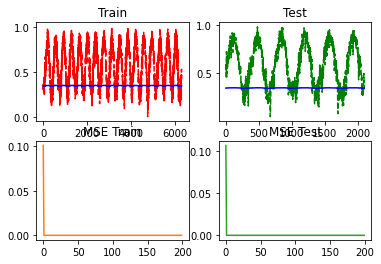

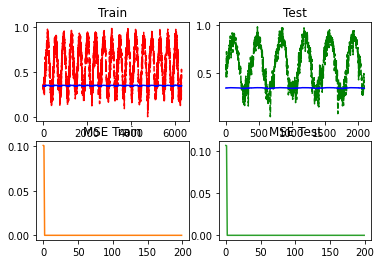

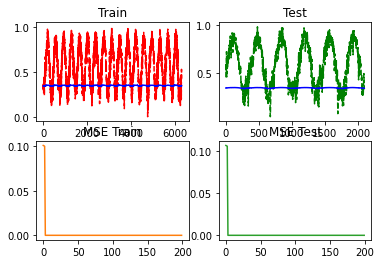

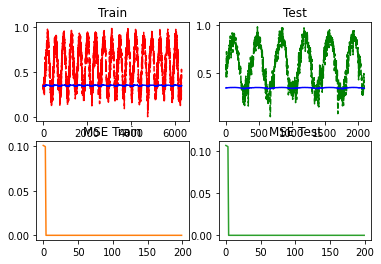

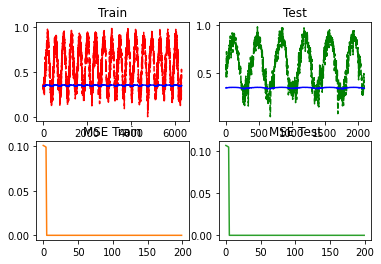

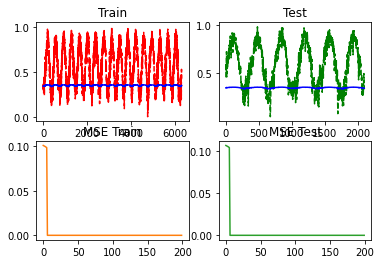

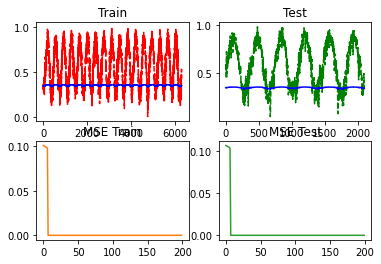

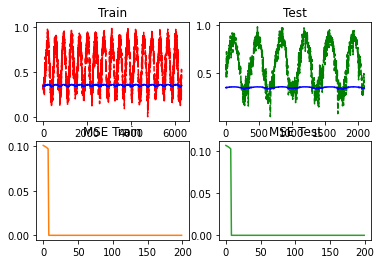

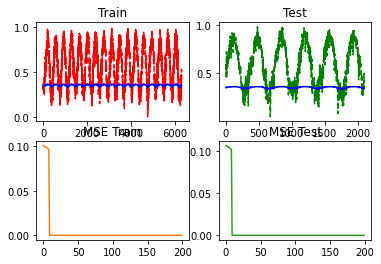

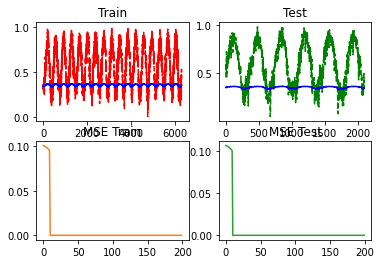

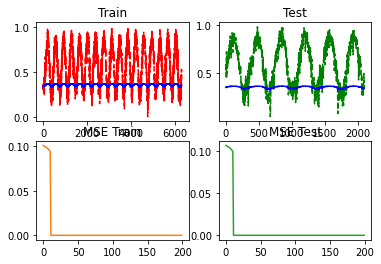

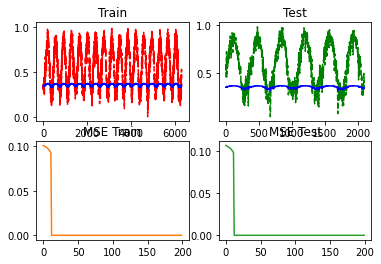

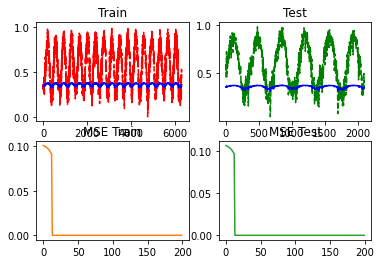

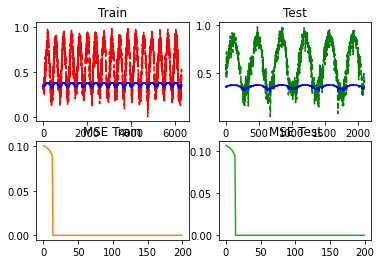

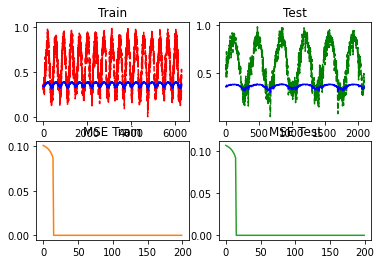

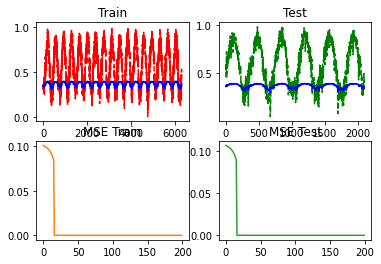

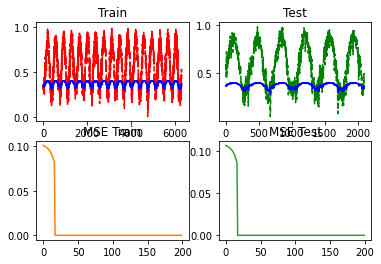

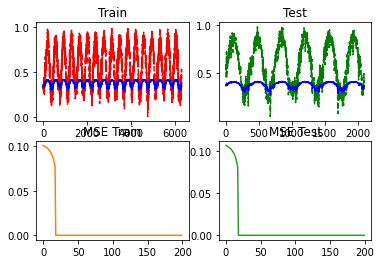

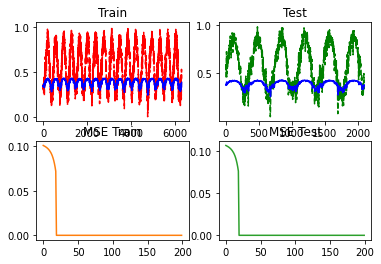

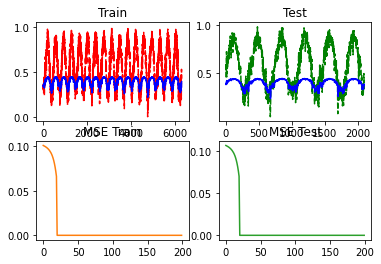

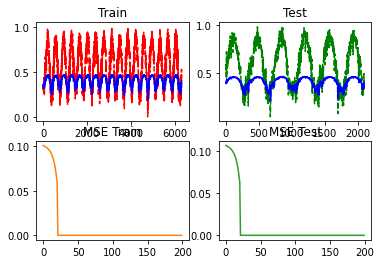

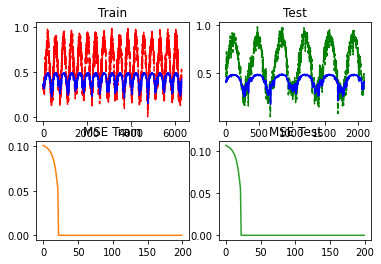

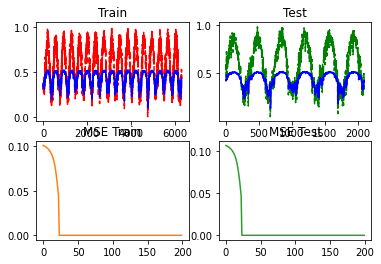

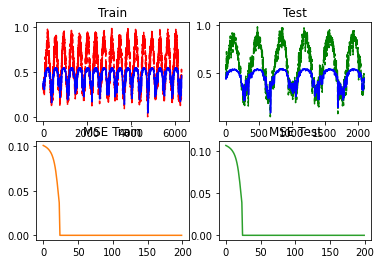

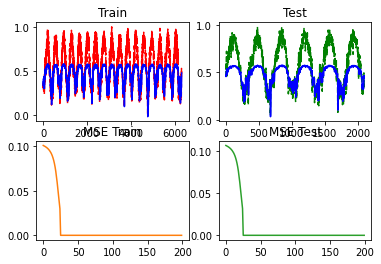

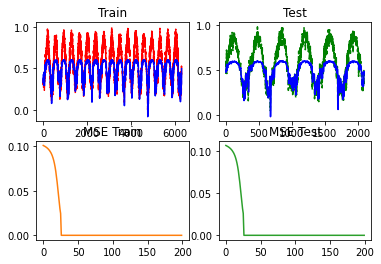

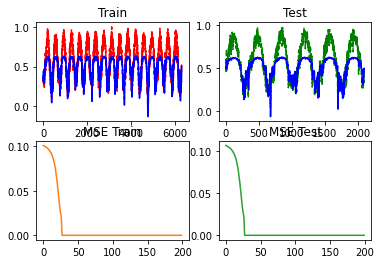

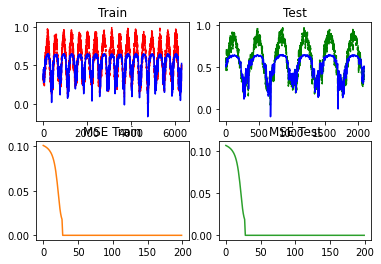

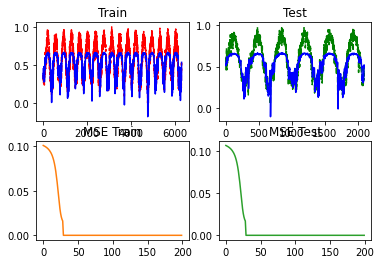

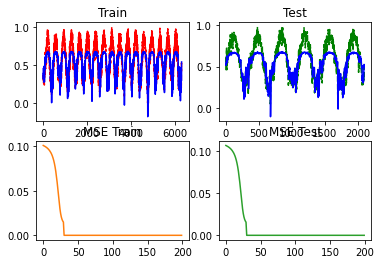

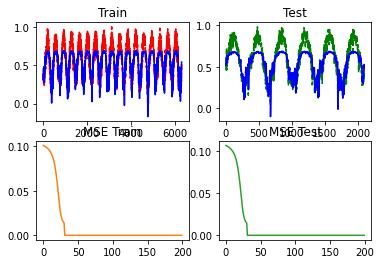

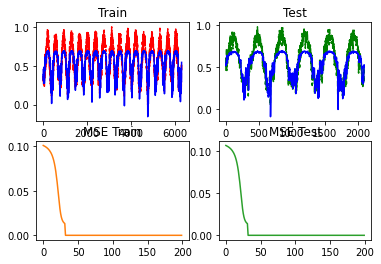

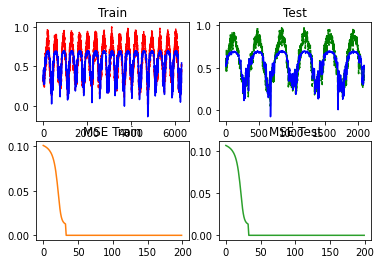

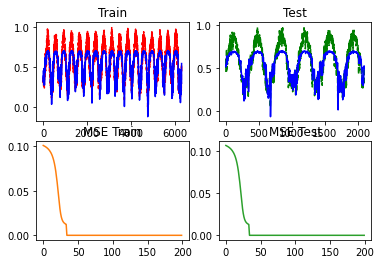

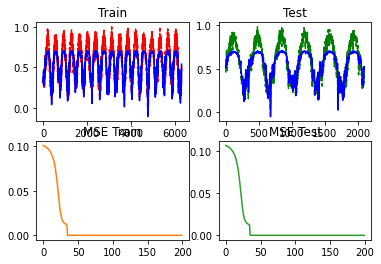

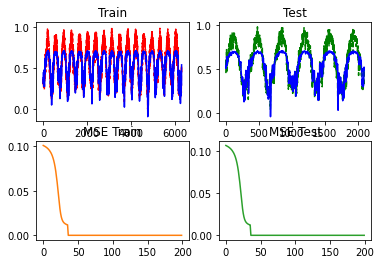

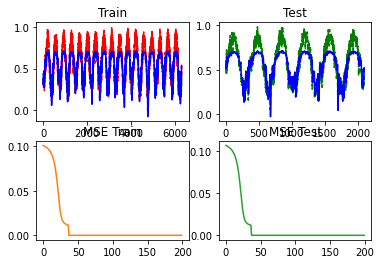

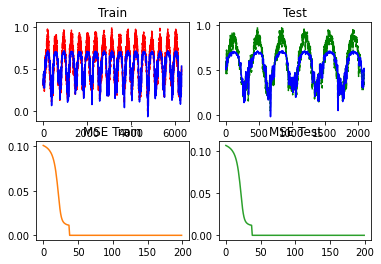

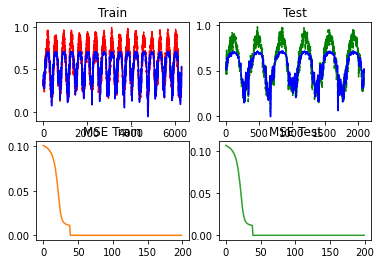

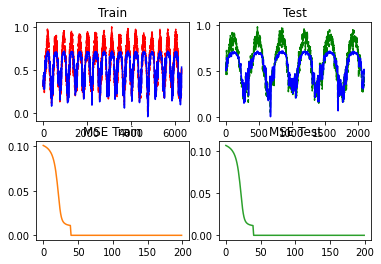

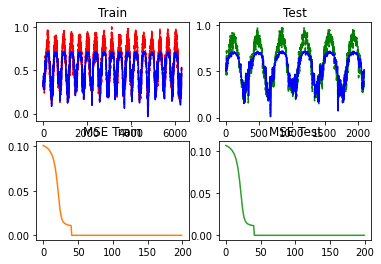

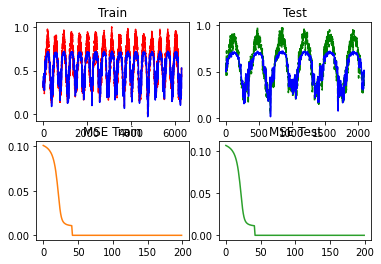

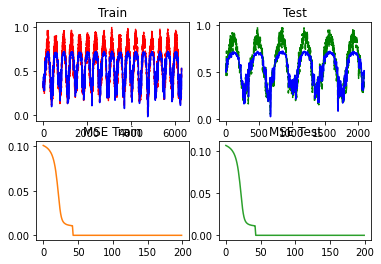

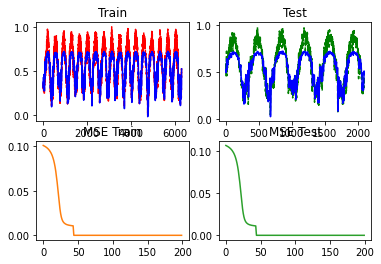

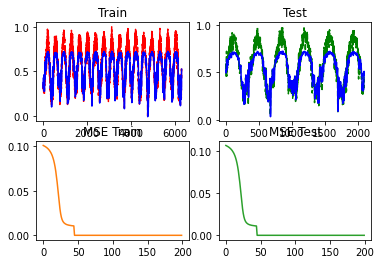

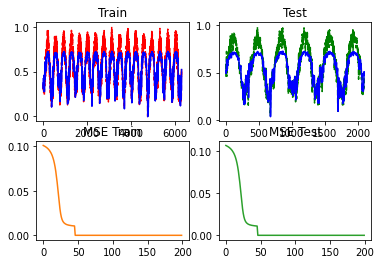

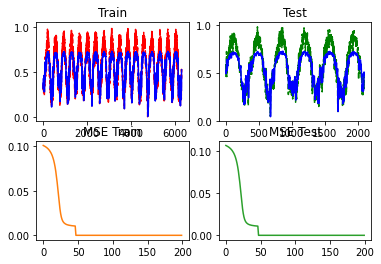

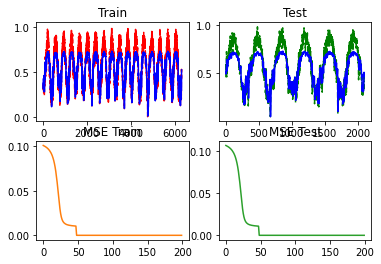

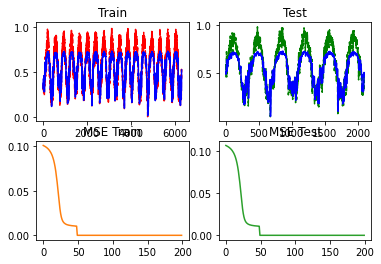

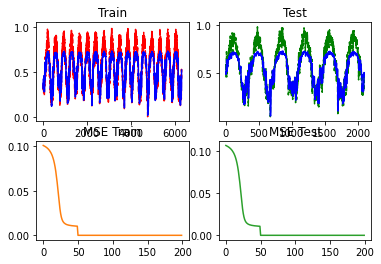

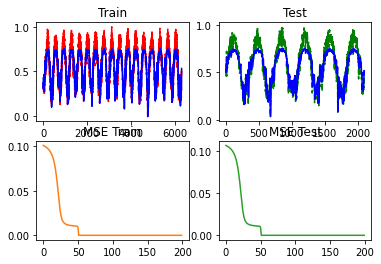

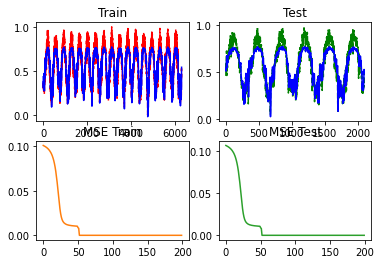

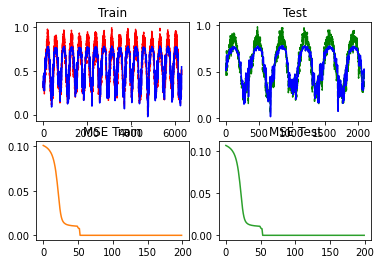

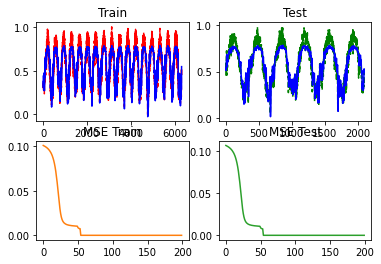

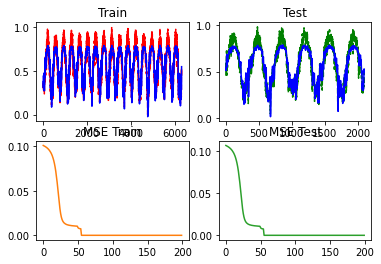

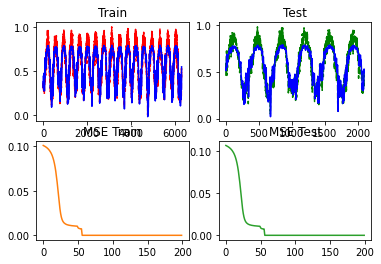

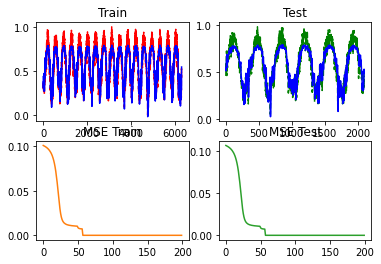

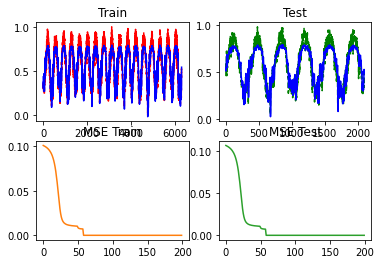

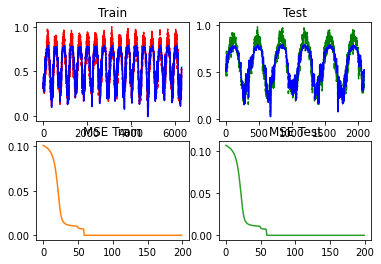

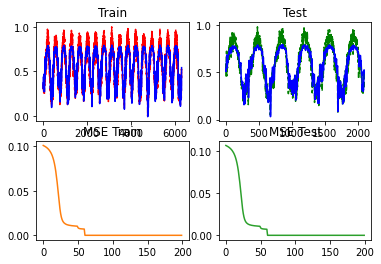

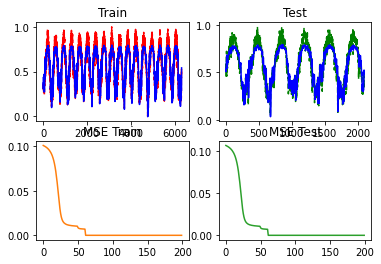

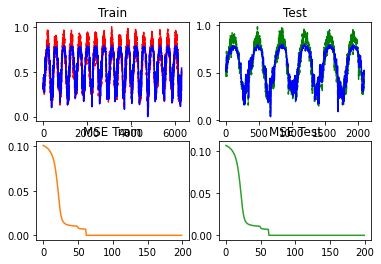

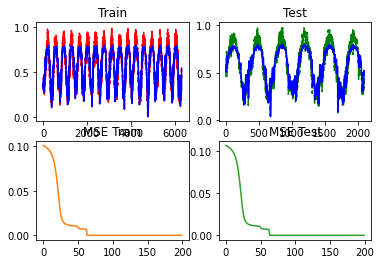

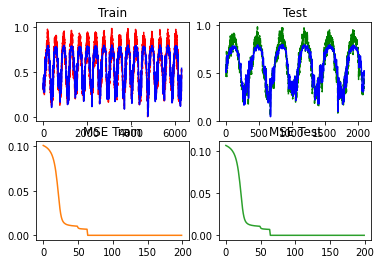

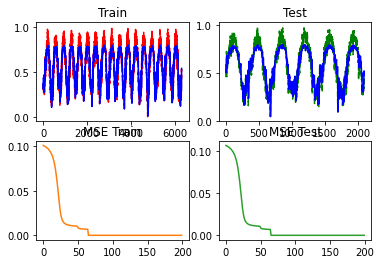

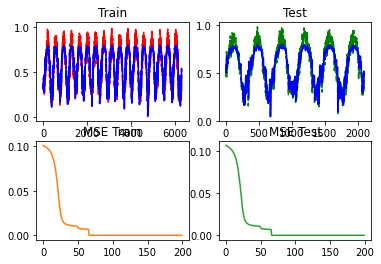

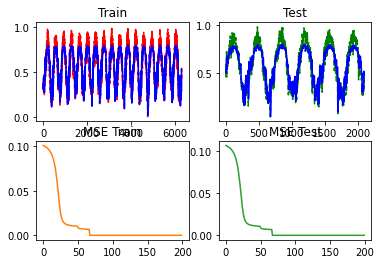

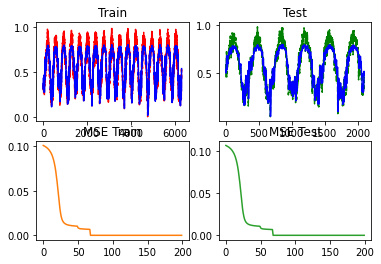

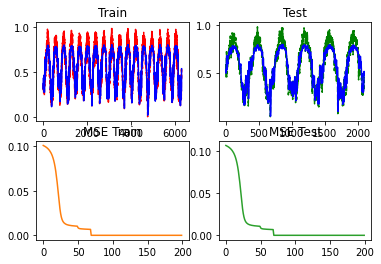

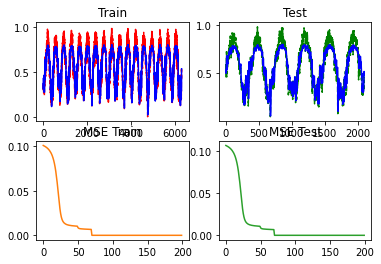

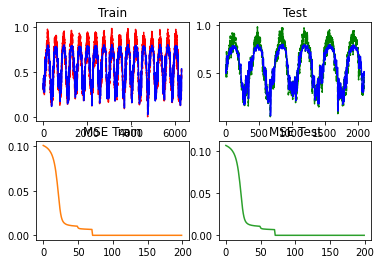

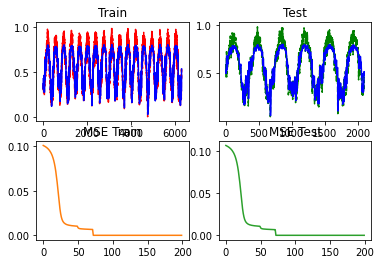

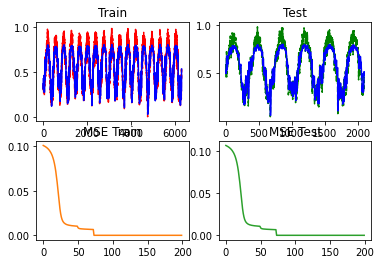

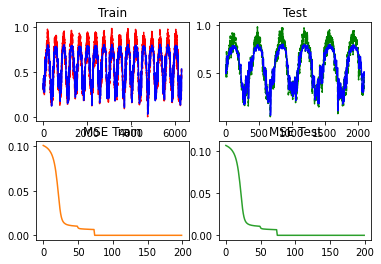

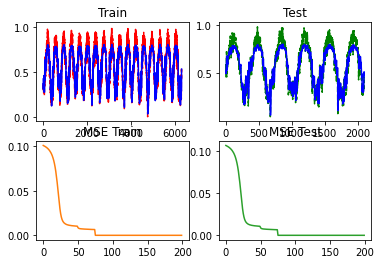

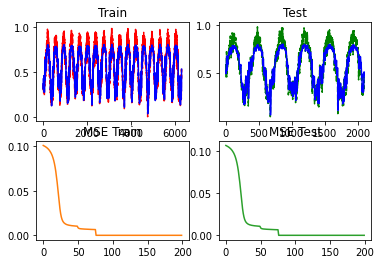

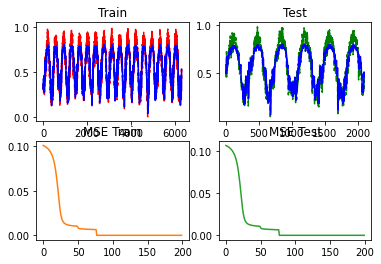

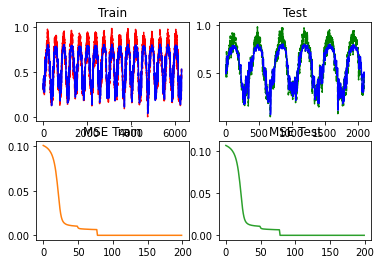

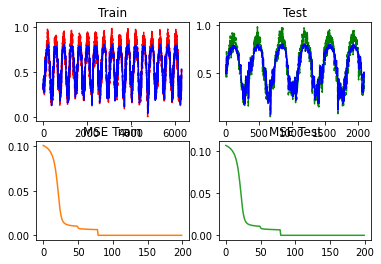

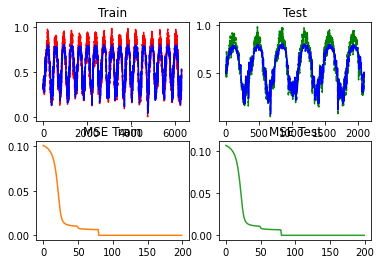

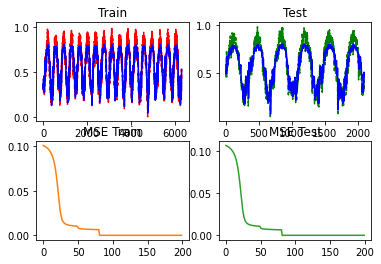

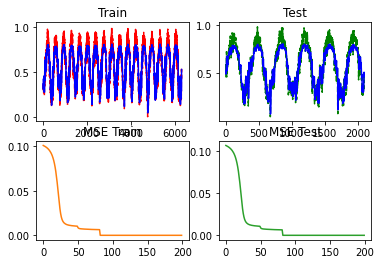

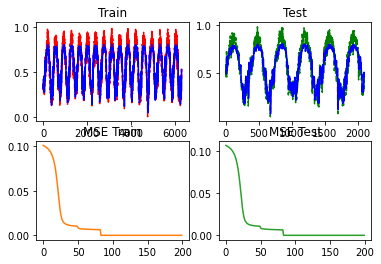

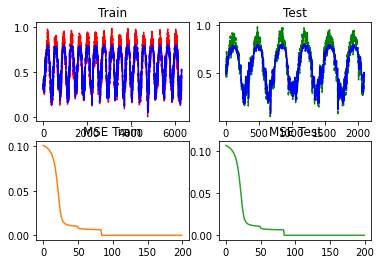

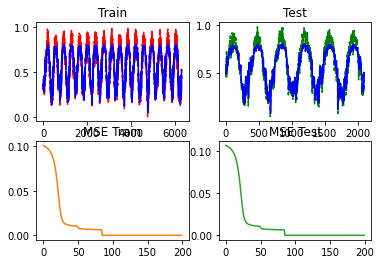

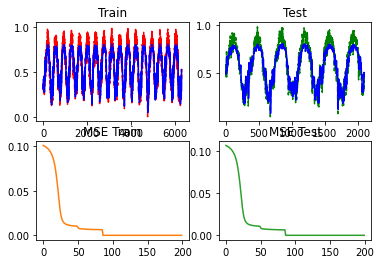

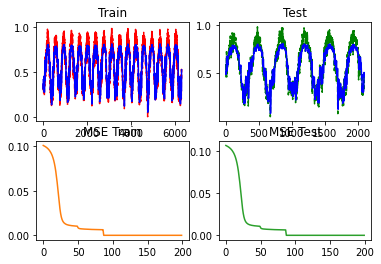

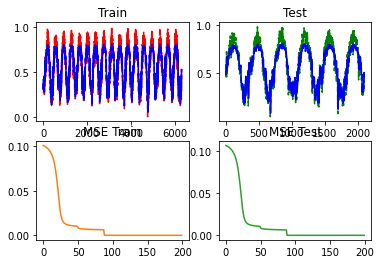

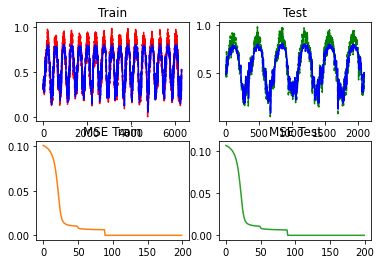

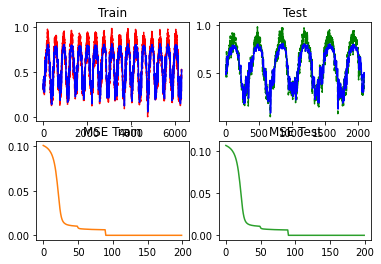

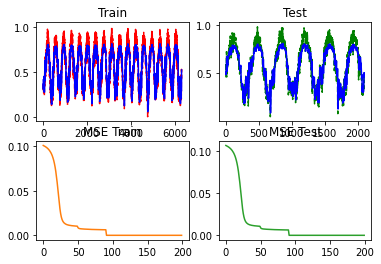

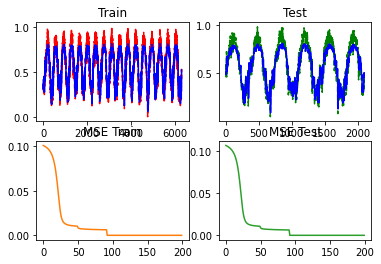

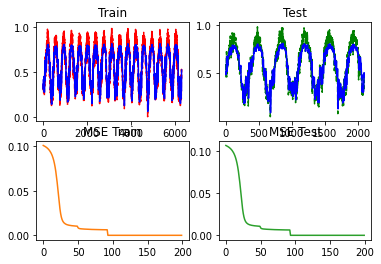

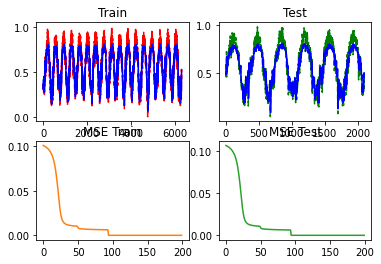

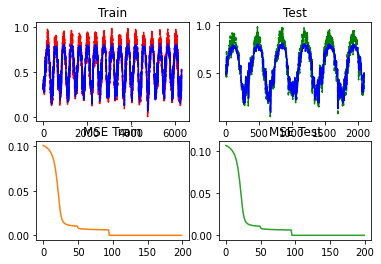

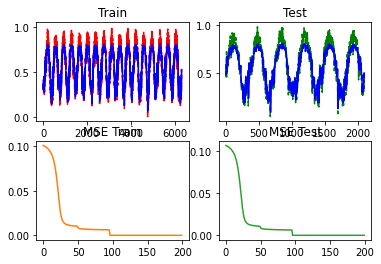

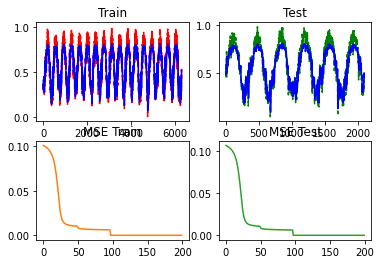

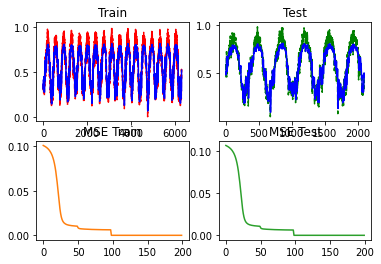

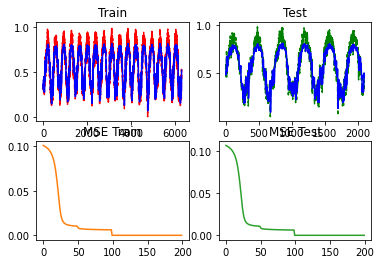

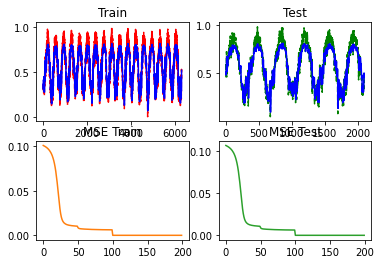

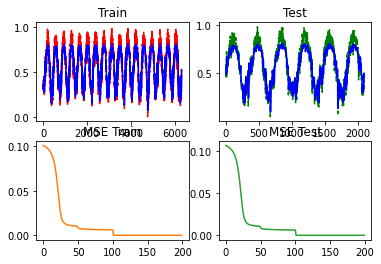

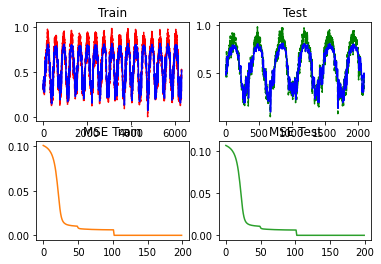

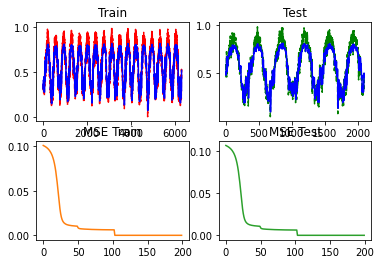

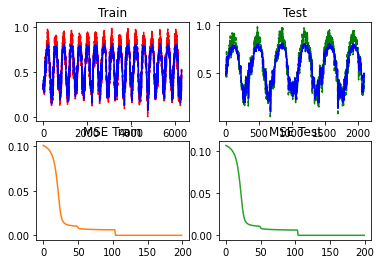

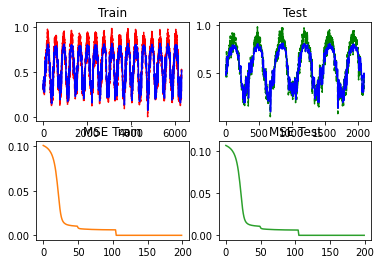

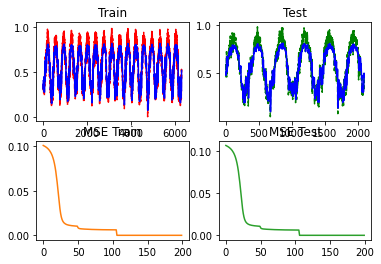

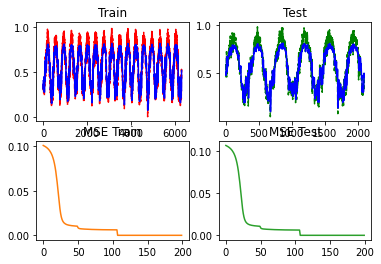

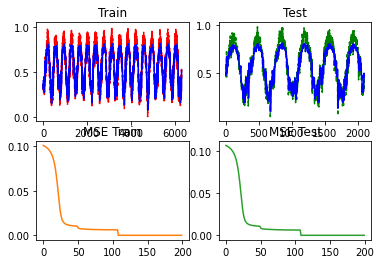

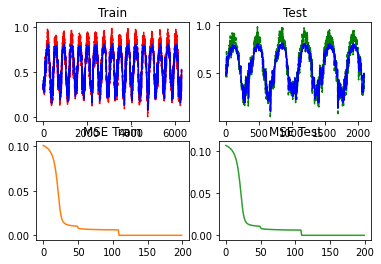

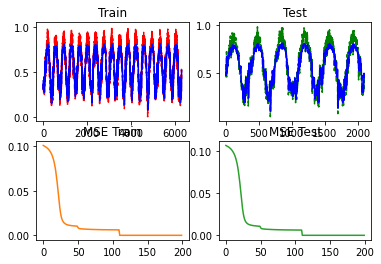

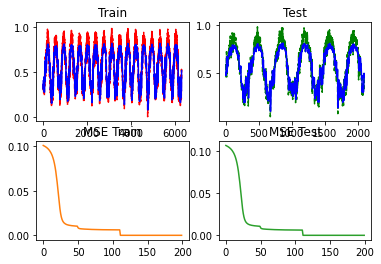

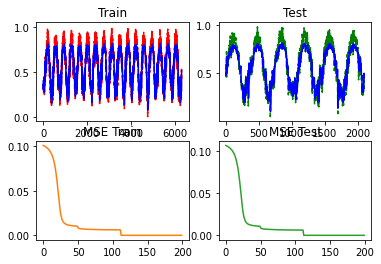

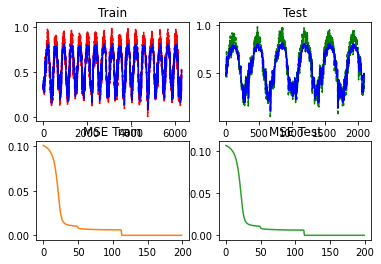

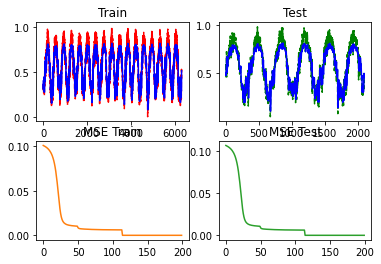

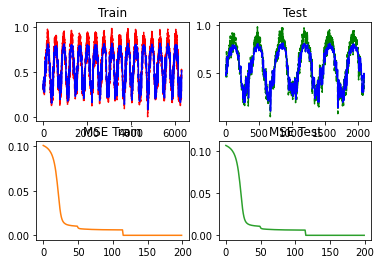

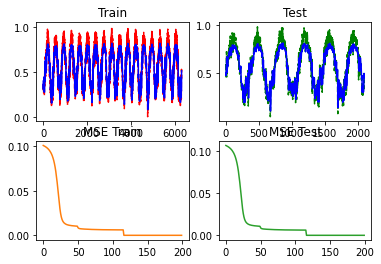

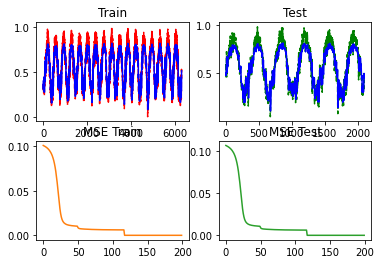

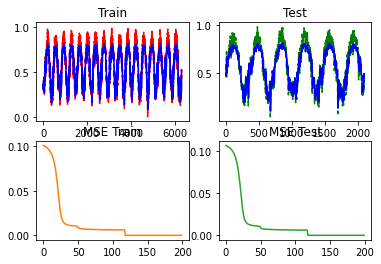

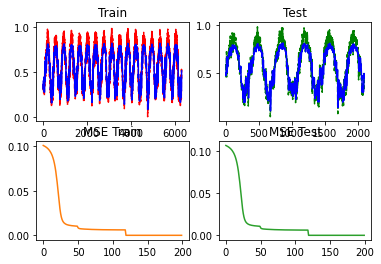

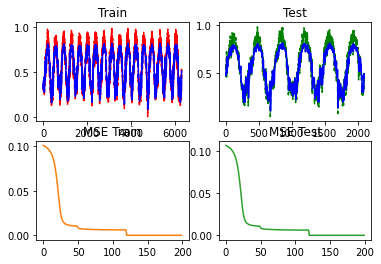

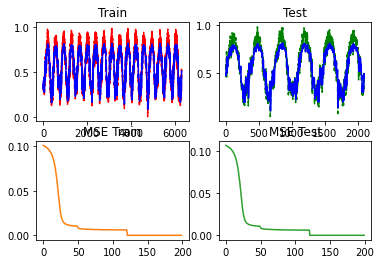

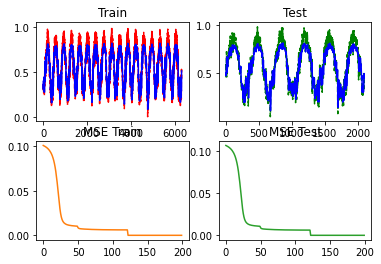

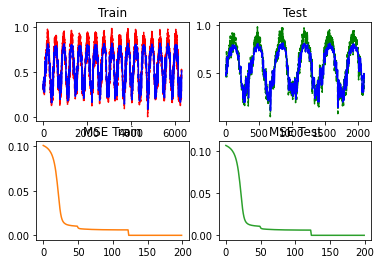

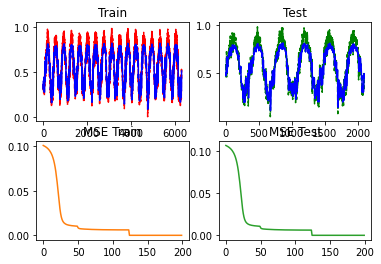

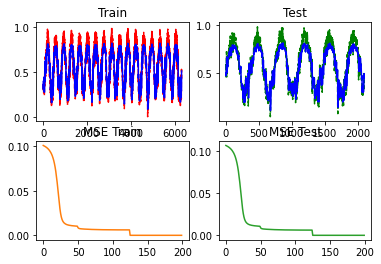

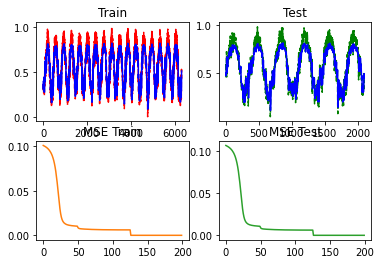

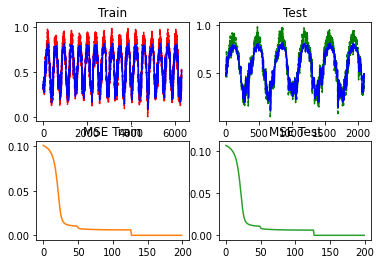

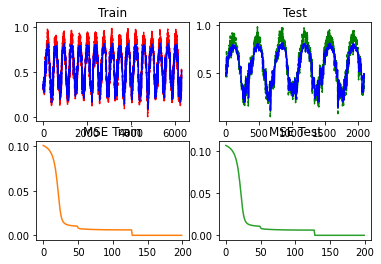

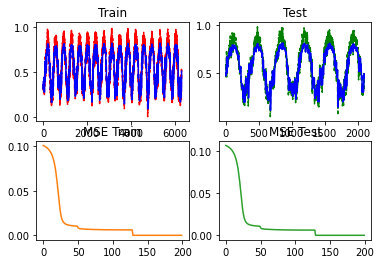

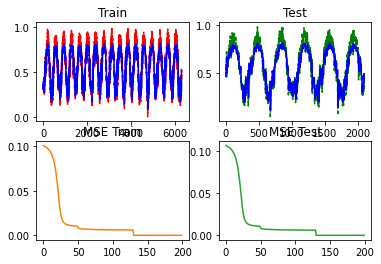

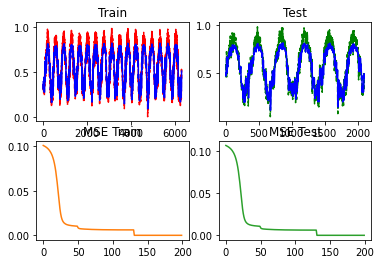

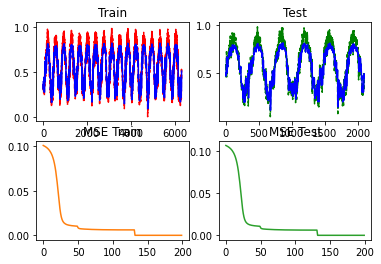

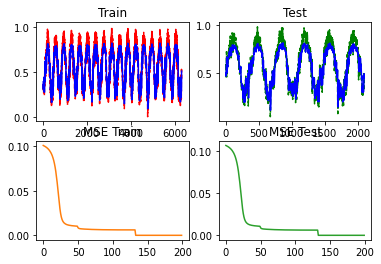

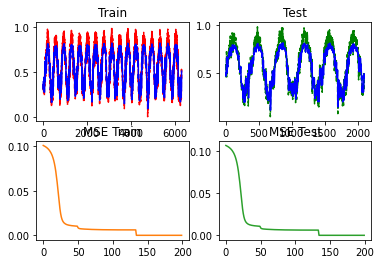

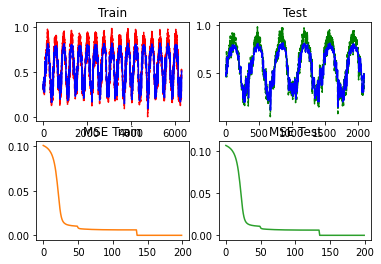

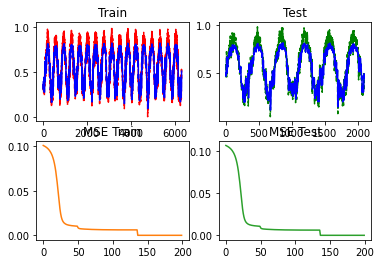

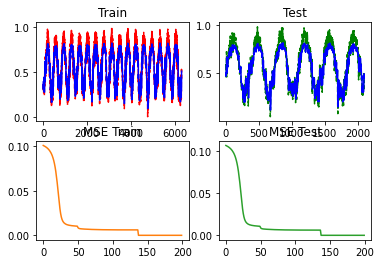

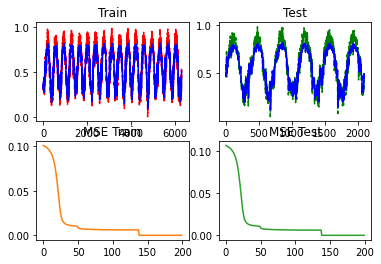

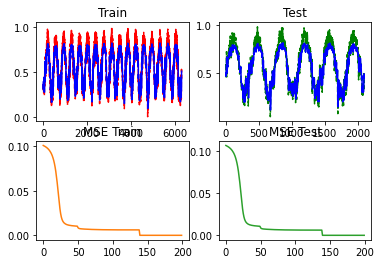

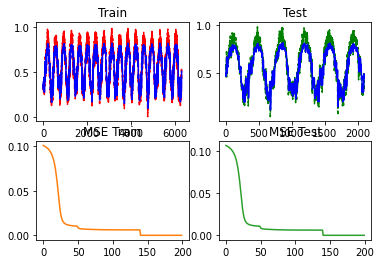

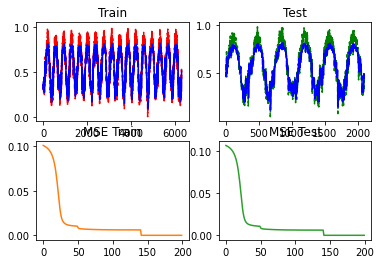

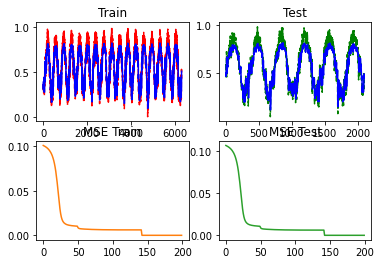

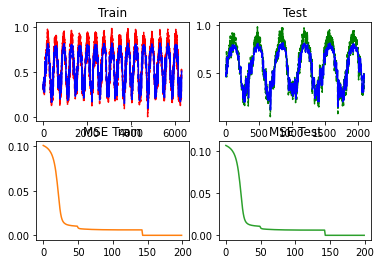

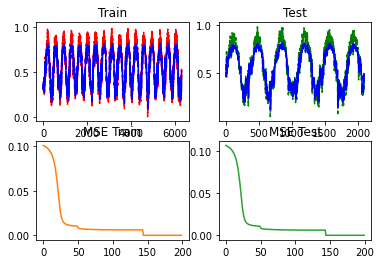

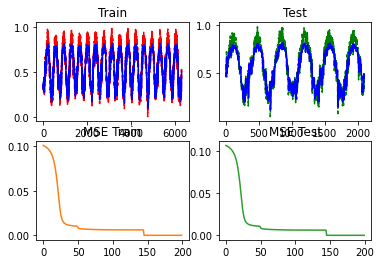

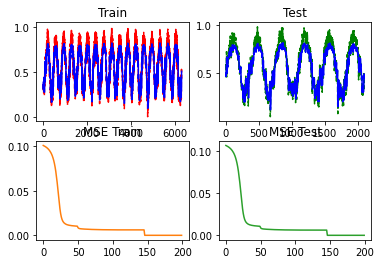

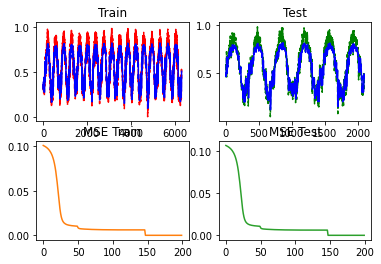

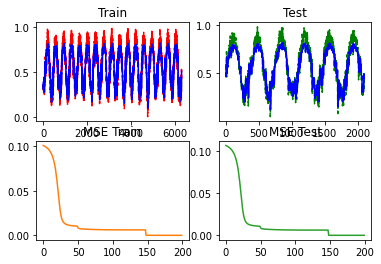

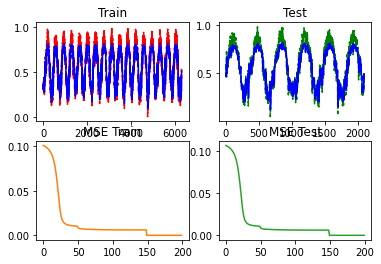

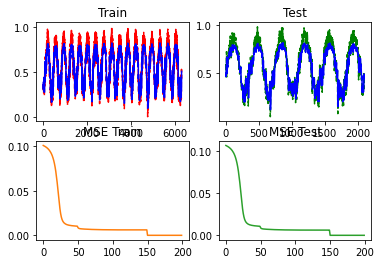

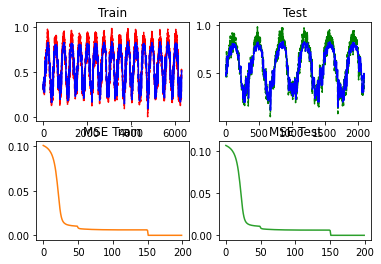

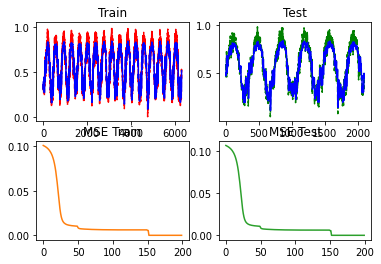

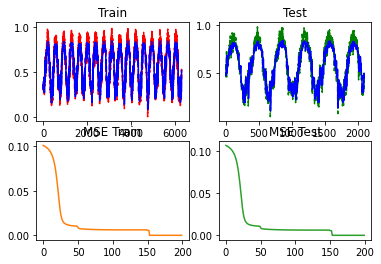

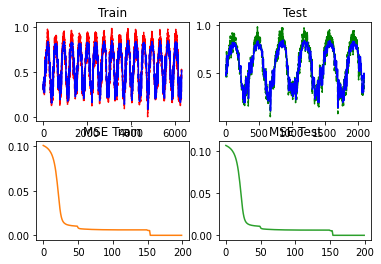

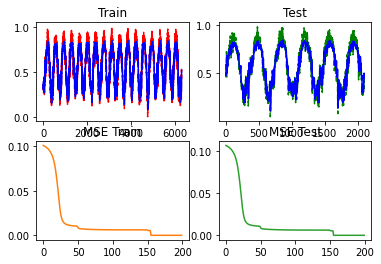

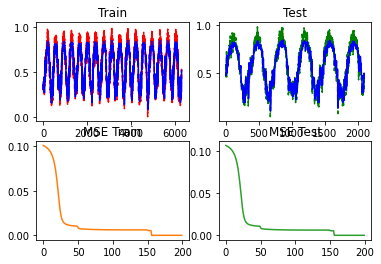

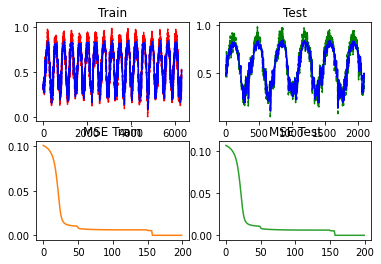

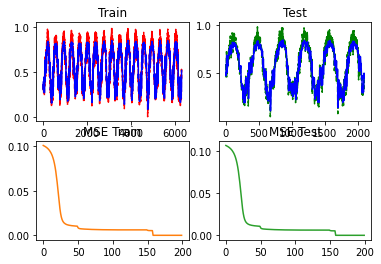

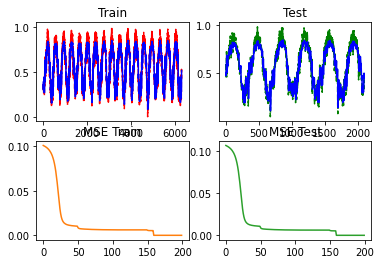

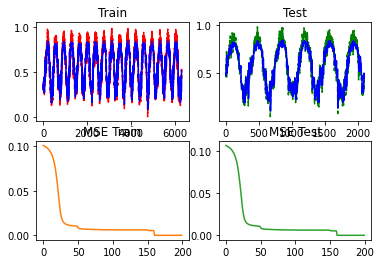

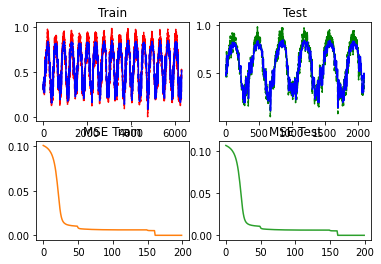

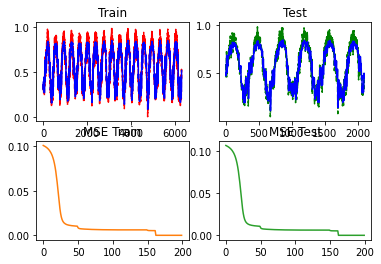

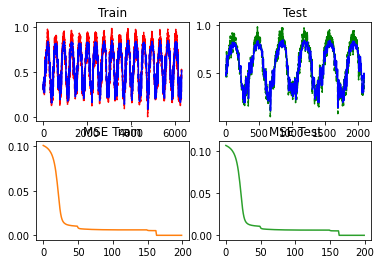

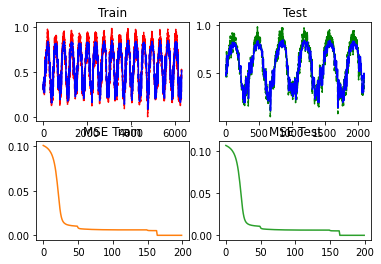

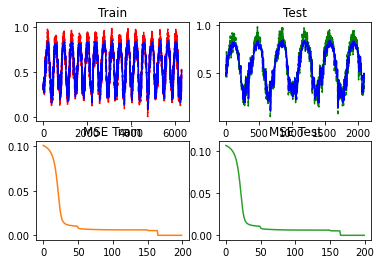

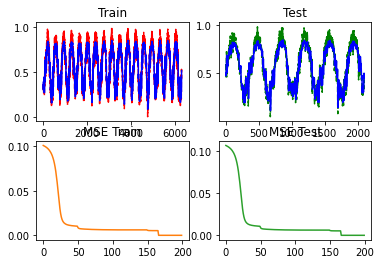

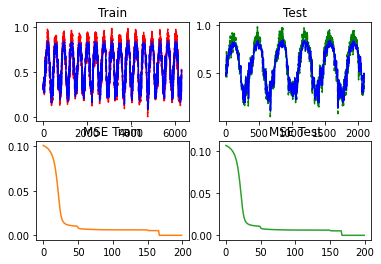

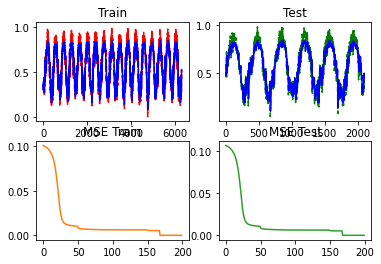

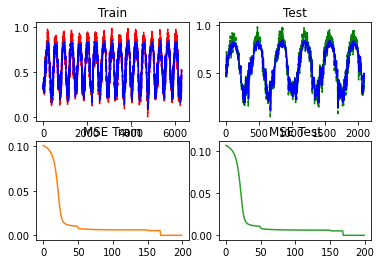

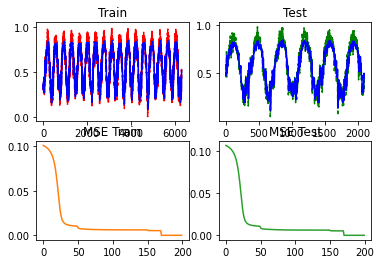

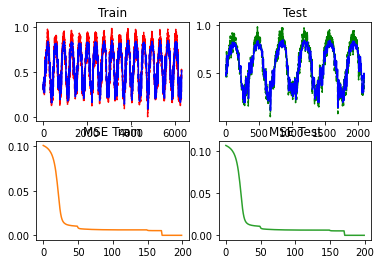

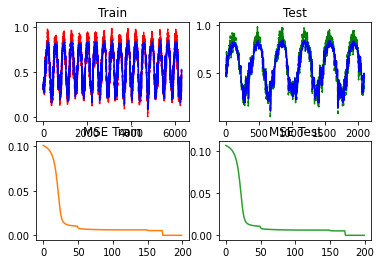

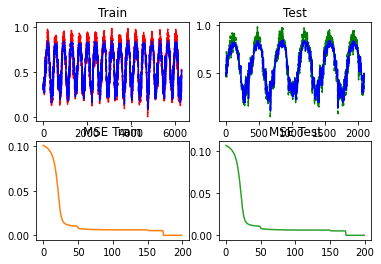

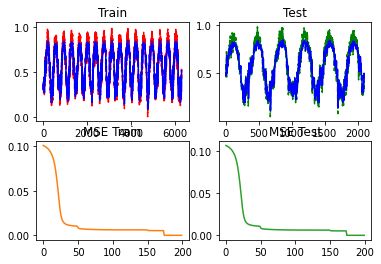

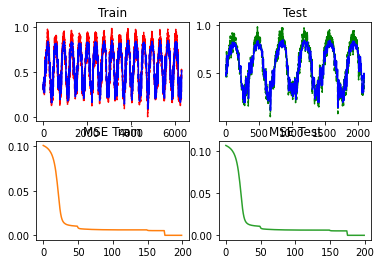

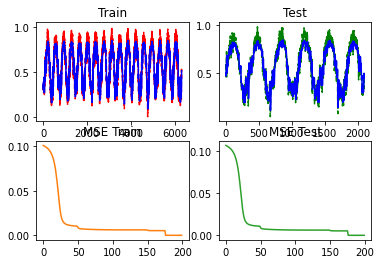

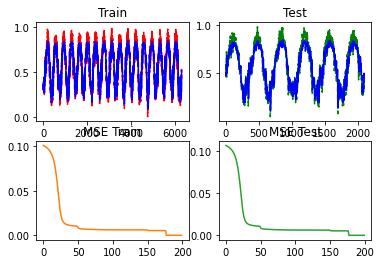

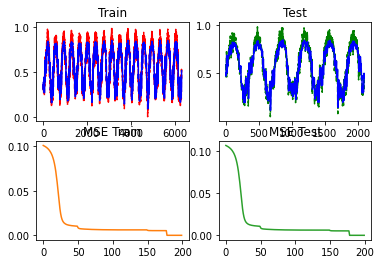

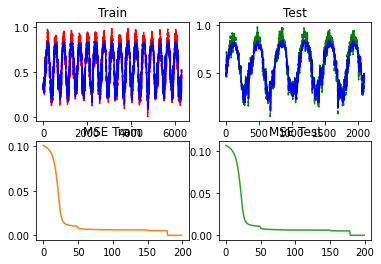

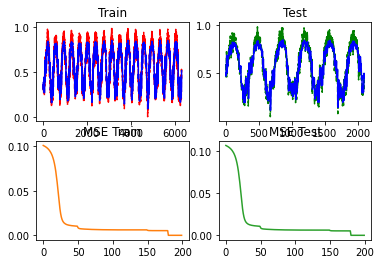

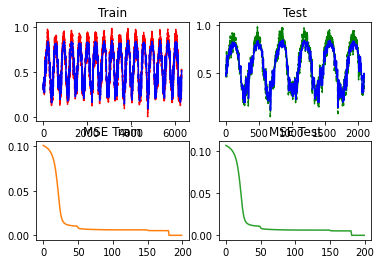

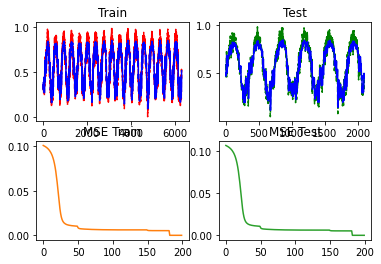

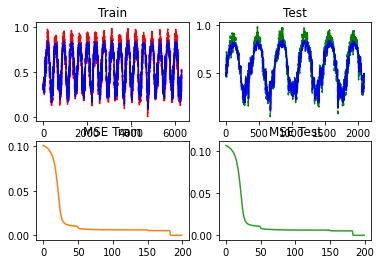

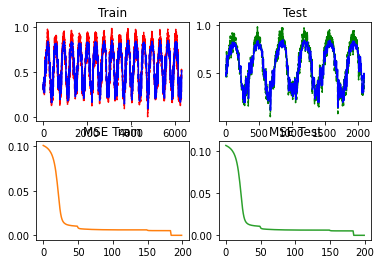

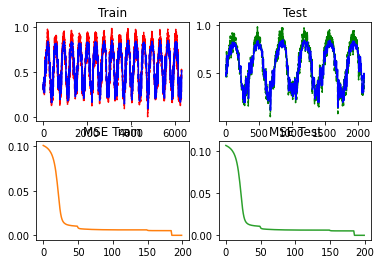

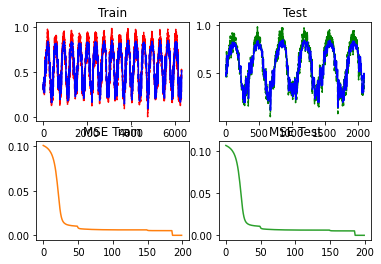

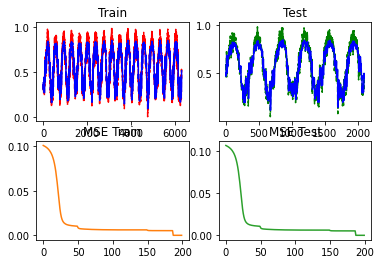

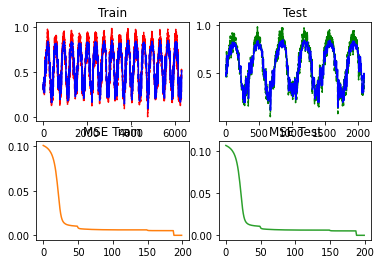

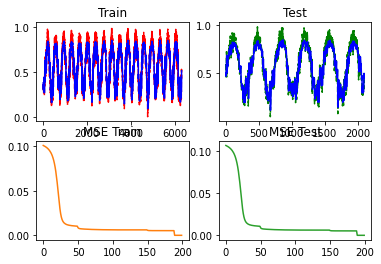

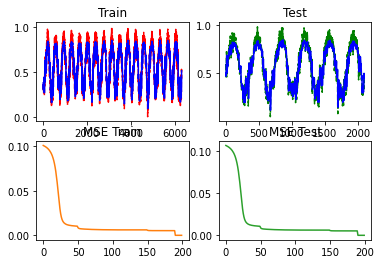

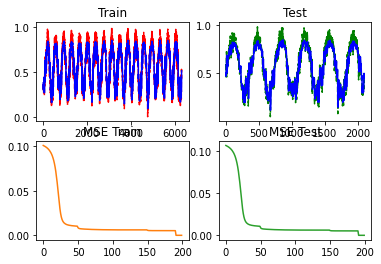

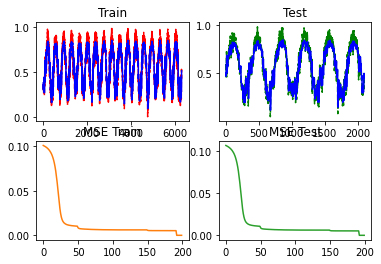

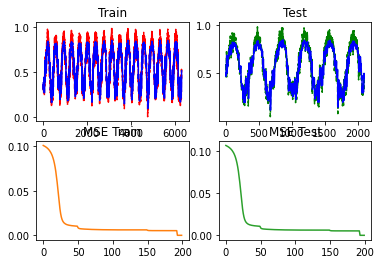

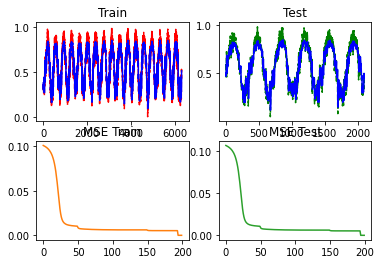

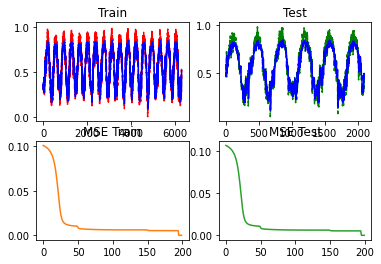

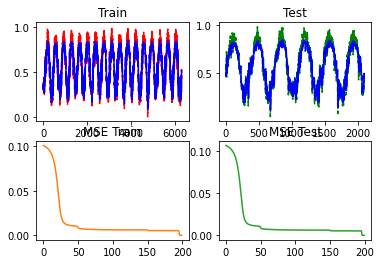

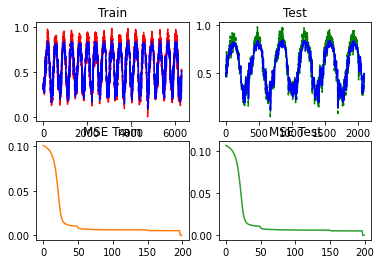

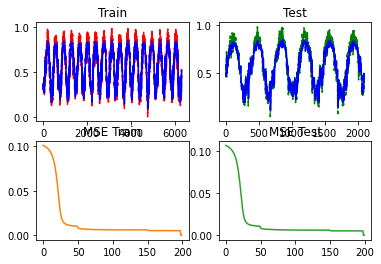

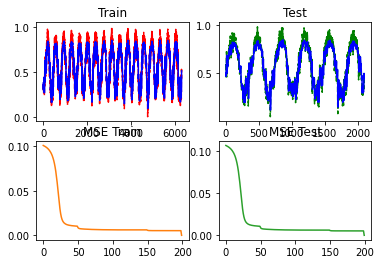

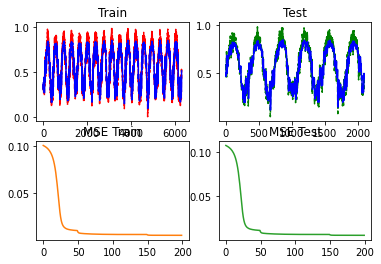

In [ ]:

# region loop for epochs



for i in range(maxOfEpoch):
    if i == 50:
      eta = 0.005
    if i == 150:
      eta = 0.003


    # region train network
    for j in range(numOfTrain):
        for k in range(m-1):
            myInput[0, k] = input_data[j, k]


        myTarget = input_data[j, m-1]
        myInput2 = np.transpose(ae3.cal(ae2.cal(ae1.cal(np.transpose(myInput)))))
        
        zo1_1 = o1
        net1 = myInput2 @ np.transpose(w1) + b1 + zo1_1 @ np.transpose(zw1_1)
        o1 = myF(net1)
       
        zo2_1 = o2
        net2 = o1 @ np.transpose(w2) + b2 + zo2_1 @ np.transpose(zw2_1)
        o2 = myF(net2)

        zo3_1 = o3
        net3 = o2 @ np.transpose(w3) + b3 + zo3_1 @ np.transpose(zw3_1)
        o3 = myF(net3)

        #net4 = o3 @ np.transpose(w4) + b4
        #o4 = myF(net4,g4)

        #net5 = o4 @ np.transpose(w5) + b5
        #o5 = myF(net5,g5)

        net6 = o3 @ np.transpose(w6)
        o6 = net6

        error = myTarget-o6

       # c = myFPrime(o5,g5)
       #A = myDiag(c)
        #c= myFPrimeg(o5,g5)
        #AA = myDiag(c)

        #c = myFPrime(o4,g4)
        #B = myDiag(c)
        #c = myFPrimeg(o4,g4)
        #BB = myDiag(c)


        c = myFPrime(o3)
        C = myDiag(c)

        c = myFPrime(o2)
        D = myDiag(c)

        c = myFPrime(o1)
        E = myDiag(c)

       # w1 = w1 - eta * error * -1 * 1 * np.transpose(w6 @ A @ w5 @ B @ w4 @ C @ w3 @ D @ w2 @ E) @ myInput2
       # b1 = b1 - eta * error * -1 * 1 * (w6 @ A @ w5 @ B @ w4 @ C @ w3 @ D @ w2 @ E)
       # g1 = g1 - etag * error * -1 * 1 * (w6 @ A @ w5 @ B @ w4 @ C @ w3 @ D @ w2 @ EE)
       # w2 = w2 - eta * error * -1 * 1 * np.transpose(w6 @ A @ w5 @ B @ w4 @ C @ w3 @ D)@o1
       # b2 = b2 - eta * error * -1 * 1 * (w6 @ A @ w5 @ B @ w4 @ C @ w3 @ D)
       # g2 = g2 - etag * error * -1 * 1 * (w6 @ A @ w5 @ B @ w4 @ C @ w3 @ DD)
        w1 = w1 - eta * error * -1 * 1 * np.transpose(w6 @ C @ w3 @ D @ w2 @ E)@ myInput2
        zw1_1 = zw1_1 - eta * error * -1 * 1 * np.transpose(w6 @ C @ w3 @ D @ w2 @ E)@ zo1_1
        b1 = b1 - eta * error * -1 * 1 * (w6 @ C @ w3 @ D @ w2 @ E)

        w2 = w2 - eta * error * -1 * 1 * np.transpose(w6 @ C @ w3 @ D)@o1
        zw2_1 = zw2_1 - eta * error * -1 * 1 * np.transpose(w6 @ C @ w3 @ D)@ zo2_1
        b2 = b2 - eta * error * -1 * 1 * (w6 @ C @ w3 @ D)

        w3 = w3 - eta * error * -1 * 1 * np.transpose(w6 @ C)@o2
        zw3_1 = zw3_1 - eta * error * -1 * 1 * np.transpose(w6 @ C)@zo3_1
        b3 = b3 - eta * error * -1 * 1 * (w6 @ C)

        w6 = w6 - eta * error * -1 * 1 * o3







    # endregion

    # region test train_data
    for j in range(numOfTrain):
        for k in range(m - 1):
            myInput[0, k] = input_data[j, k]

        myTarget = input_data[j, m-1]
        myInput2 = np.transpose(ae3.cal(ae2.cal(ae1.cal(np.transpose(myInput)))))

        zo1_1 = o1
        net1 = myInput2 @ np.transpose(w1) + b1 + zo1_1 @ np.transpose(zw1_1)
        o1 = myF(net1)
        
        zo2_1 = o2
        net2 = o1 @ np.transpose(w2) + b2 + zo2_1 @ np.transpose(zw2_1)
        o2 = myF(net2)
        
        zo3_1 = o3
        net3 = o2 @ np.transpose(w3) + b3 + zo3_1 @ np.transpose(zw3_1)
        o3 = myF(net3)

        #net4 = o3 @ np.transpose(w4) + b4
        #o4 = myF(net4,g4)

        #net5 = o4 @ np.transpose(w5) + b5
        #o5 = myF(net5,g5)

        net6 = o3 @ np.transpose(w6)
        o6 = net6

        error = myTarget-o6
        train_error[j] = error

        output_train[j] = o6



    # endregion

    # region test test_data
    for j in range(numOfTest):

        for k in range(m - 1):
            myInput[0, k] = input_data[j+numOfTrain, k]

        myTarget = input_data[j+numOfTrain, m - 1]
        myInput2 = np.transpose(ae3.cal(ae2.cal(ae1.cal(np.transpose(myInput)))))

        zo1_1 = o1
        net1 = myInput2 @ np.transpose(w1) + b1 + zo1_1 @ np.transpose(zw1_1)
        o1 = myF(net1)

        zo2_1 = o2
        net2 = o1 @ np.transpose(w2) + b2 + zo2_1 @ np.transpose(zw2_1)
        o2 = myF(net2)

        zo3_1 = o3
        net3 = o2 @ np.transpose(w3) + b3 + zo3_1 @ np.transpose(zw3_1)
        o3 = myF(net3)


        #net4 = o3 @ np.transpose(w4) + b4
        #o4 = myF(net4,g4)

        #net5 = o4 @ np.transpose(w5) + b5
        #o5 = myF(net5,g5)

        net6 = o3 @ np.transpose(w6)
        o6 = net6

        error = myTarget-o6
        test_error[j] = error

        output_test[j] = o6
    # endregion
    # global training 



    mse_train[i] = myMSE(train_error)
    mse_test[i] = myMSE(test_error)


    fig, axs = plt.subplots(2, 2)

    axs[0, 0].plot(input_data[0:numOfTrain, m-1],'r--',output_train,'b')
    axs[0, 0].set_title('Train')
    axs[0, 1].plot(input_data[numOfTrain:, m-1], 'g--', output_test,'b')
    axs[0, 1].set_title('Test')
    axs[1, 0].plot(mse_train, 'tab:orange')
    axs[1, 0].set_title('MSE Train')
    axs[1, 1].plot(mse_test, 'tab:green')
    axs[1, 1].set_title('MSE Test')




    # plt.subplot(411)
    # plt.plot(input_data[0:numOfTrain, 3],'r--',output_train,'b')
    # plt.title('Train')
    #
    # plt.subplot(412)
    # plt.plot(input_data[numOfTrain:, 3], 'g--', output_test,'b')
    # plt.title('Test')
    #
    # plt.subplot(421)
    # plt.plot(mse_train)
    # plt.subplot(422)
    # plt.plot(mse_test)

    plt.pause(0.01)
    plt.close(fig)

plt.show()


# endregion



In [ ]:
plt.savefig("abc.png")
files.download("abc.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# region import data

uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#endregion

Saving DLdata3.xlsx to DLdata3.xlsx
User uploaded file "DLdata3.xlsx" with length 17362 bytes


In [ ]:

# region prepare data
data = 0;
data = pd.read_excel('DLdata3.xlsx', header=None)
data = data.to_numpy()
m = 4
mm =5
train_rate = 0.5
input_data = np.zeros((data.size - mm, m))
initializeData()

# endregion

0

In [ ]:

numberOfData = input_data.shape[0]
numOfTrain = round(numberOfData*train_rate)
numOfTest = numberOfData-numOfTrain

In [ ]:
eta = 0.01
train_error = np.zeros((numOfTrain, 1))
test_error = np.zeros((numOfTest, 1))
output_train = np.zeros((numOfTrain, 1))
output_test = np.zeros((numOfTest, 1))

mse_train = np.zeros((maxOfEpoch, 1))
mse_test = np.zeros((maxOfEpoch, 1))

myTarget = 0
error = 0
c = 0



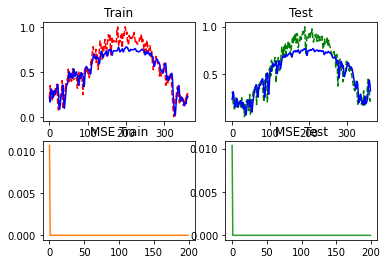

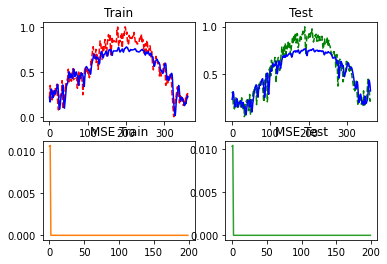

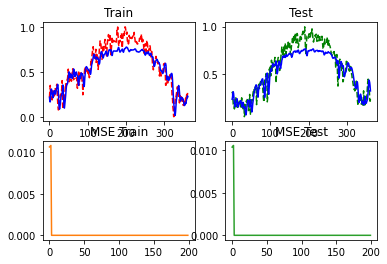

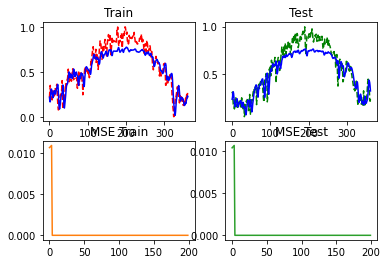

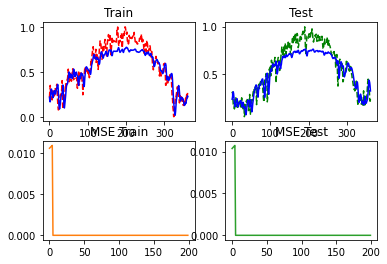

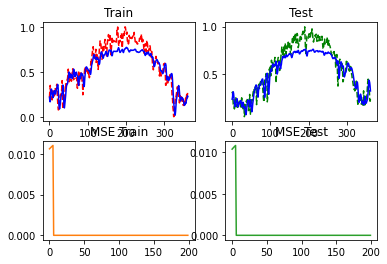

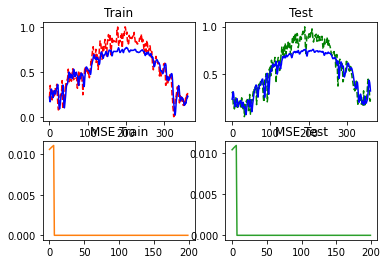

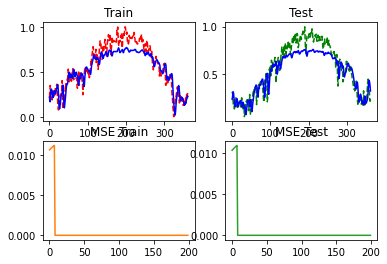

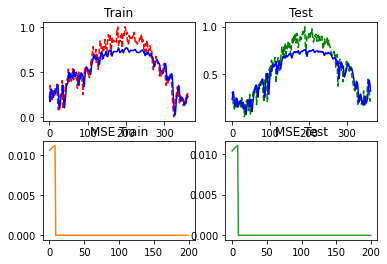

In [ ]:


for i in range(maxOfEpoch):

    if i == 50:
      eta = 0.003

    # region train network
    for j in range(numOfTrain):
        for k in range(m-1):
            myInput[0, k] = input_data[j, k]


        myTarget = input_data[j, m-1]
        myInput2 = np.transpose(ae3.cal(ae2.cal(ae1.cal(np.transpose(myInput)))))

        net1 = myInput2 @ np.transpose(w1) + b1
        o1 = myF(net1)

        net2 = o1 @ np.transpose(w2) + b2
        o2 = myF(net2)

        net3 = o2 @ np.transpose(w3) + b3
        o3 = myF(net3)

        #net4 = o3 @ np.transpose(w4) + b4
        #o4 = myF(net4,g4)

        #net5 = o4 @ np.transpose(w5) + b5
        #o5 = myF(net5,g5)

        net6 = o3 @ np.transpose(w6)
        o6 = net6

        error = myTarget-o6

       # c = myFPrime(o5,g5)
       #A = myDiag(c)
        #c= myFPrimeg(o5,g5)
        #AA = myDiag(c)

        #c = myFPrime(o4,g4)
        #B = myDiag(c)
        #c = myFPrimeg(o4,g4)
        #BB = myDiag(c)


        c = myFPrime(o3)
        C = myDiag(c)

        c = myFPrime(o2)
        D = myDiag(c)

        c = myFPrime(o1)
        E = myDiag(c)

       # w1 = w1 - eta * error * -1 * 1 * np.transpose(w6 @ A @ w5 @ B @ w4 @ C @ w3 @ D @ w2 @ E) @ myInput2
       # b1 = b1 - eta * error * -1 * 1 * (w6 @ A @ w5 @ B @ w4 @ C @ w3 @ D @ w2 @ E)
       # g1 = g1 - etag * error * -1 * 1 * (w6 @ A @ w5 @ B @ w4 @ C @ w3 @ D @ w2 @ EE)
       # w2 = w2 - eta * error * -1 * 1 * np.transpose(w6 @ A @ w5 @ B @ w4 @ C @ w3 @ D)@o1
       # b2 = b2 - eta * error * -1 * 1 * (w6 @ A @ w5 @ B @ w4 @ C @ w3 @ D)
       # g2 = g2 - etag * error * -1 * 1 * (w6 @ A @ w5 @ B @ w4 @ C @ w3 @ DD)
        w1 = w1 - eta * error * -1 * 1 * np.transpose(w6 @ C @ w3 @ D @ w2 @ E)@ myInput2
        b1 = b1 - eta * error * -1 * 1 * (w6 @ C @ w3 @ D @ w2 @ E)
        w2 = w2 - eta * error * -1 * 1 * np.transpose(w6 @ C @ w3 @ D)@o1
        b2 = b2 - eta * error * -1 * 1 * (w6 @ C @ w3 @ D)
        w3 = w3 - eta * error * -1 * 1 * np.transpose(w6 @ C)@o2
        b3 = b3 - eta * error * -1 * 1 * (w6 @ C)
        w6 = w6 - eta * error * -1 * 1 * o3




    # endregion

    # region test train_data
    for j in range(numOfTrain):
        for k in range(m - 1):
            myInput[0, k] = input_data[j, k]

        myTarget = input_data[j, m-1]
        myInput2 = np.transpose(ae3.cal(ae2.cal(ae1.cal(np.transpose(myInput)))))

        net1 = myInput2 @ np.transpose(w1) + b1
        o1 = myF(net1)

        net2 = o1 @ np.transpose(w2) + b2
        o2 = myF(net2)

        net3 = o2 @ np.transpose(w3) + b3
        o3 = myF(net3)

        #net4 = o3 @ np.transpose(w4) + b4
        #o4 = myF(net4,g4)

        #net5 = o4 @ np.transpose(w5) + b5
        #o5 = myF(net5,g5)

        net6 = o3 @ np.transpose(w6)
        o6 = net6

        error = myTarget-o6
        train_error[j] = error

        output_train[j] = o6
    # endregion

    # region test test_data
    for j in range(numOfTest):

        for k in range(m - 1):
            myInput[0, k] = input_data[j+numOfTrain, k]

        myTarget = input_data[j+numOfTrain, m - 1]
        myInput2 = np.transpose(ae3.cal(ae2.cal(ae1.cal(np.transpose(myInput)))))

        net1 = myInput2 @ np.transpose(w1) + b1
        o1 = myF(net1)

        net2 = o1 @ np.transpose(w2) + b2
        o2 = myF(net2)

        net3 = o2 @ np.transpose(w3) + b3
        o3 = myF(net3)

        #net4 = o3 @ np.transpose(w4) + b4
        #o4 = myF(net4,g4)

        #net5 = o4 @ np.transpose(w5) + b5
        #o5 = myF(net5,g5)

        net6 = o3 @ np.transpose(w6)
        o6 = net6

        error = myTarget-o6
        test_error[j] = error

        output_test[j] = o6
    # endregion
    # global training 



    mse_train[i] = myMSE(train_error)
    mse_test[i] = myMSE(test_error)


    fig, axs = plt.subplots(2, 2)

    axs[0, 0].plot(input_data[0:numOfTrain, m-1],'r--',output_train,'b')
    axs[0, 0].set_title('Train')
    axs[0, 1].plot(input_data[numOfTrain:, m-1], 'g--', output_test,'b')
    axs[0, 1].set_title('Test')
    axs[1, 0].plot(mse_train, 'tab:orange')
    axs[1, 0].set_title('MSE Train')
    axs[1, 1].plot(mse_test, 'tab:green')
    axs[1, 1].set_title('MSE Test')




    # plt.subplot(411)
    # plt.plot(input_data[0:numOfTrain, 3],'r--',output_train,'b')
    # plt.title('Train')
    #
    # plt.subplot(412)
    # plt.plot(input_data[numOfTrain:, 3], 'g--', output_test,'b')
    # plt.title('Test')
    #
    # plt.subplot(421)
    # plt.plot(mse_train)
    # plt.subplot(422)
    # plt.plot(mse_test)

    plt.pause(0.01)
    plt.close(fig)

plt.show()


# endregion